<a href="https://colab.research.google.com/github/ravi260372/Data_Science_Python/blob/main/Income_Prediction_RF_Code_Academy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting Income with Random Forests**

In this project, we will be using a dataset containing census information from UCI’s Machine Learning Repository.

By using this census data with a random forest, we will try to predict whether or not a person makes more than $50,000.

**Investigate The Data**  
Let’s begin by investigating the data available to us. 
Attributes of the dataset :   
Income : >50K, <=50K.  
age: continuous.  
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  
fnlwgt: continuous.  
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  
education-num: continuous.  
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  
sex: Female, Male.  
capital-gain: continuous.    
capital-loss: continuous.
hours-per-week: continuous.  
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.  

In [2]:
# load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

# load the modeling libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [3]:
# load datafile in workspace
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving income.csv to income.csv
User uploaded file "income.csv" with length 3844231 bytes


In [27]:
# load the data into a dataframe and inspect a few rows
df = pd.read_csv("income.csv" , header = 0, delimiter = ",") ## 1st row is the header and data is "comma separated"

df.sample(5).T

,10307,22512,3181,4853,3407
age,45,46,21,18,52
workclass,Private,Private,Private,Private,Private
fnlwgt,234652,305160,57211,168288,117674
education,5th-6th,1st-4th,HS-grad,HS-grad,Some-college
education-num,3,2,9,9,10
marital-status,Married-civ-spouse,Married-civ-spouse,Never-married,Never-married,Married-civ-spouse
occupation,Machine-op-inspct,Handlers-cleaners,Craft-repair,Handlers-cleaners,Exec-managerial
relationship,Husband,Husband,Own-child,Own-child,Husband
race,White,White,White,White,White
sex,Male,Male,Male,Male,Male


**Variable Identification**

In [28]:
# Tabular view of Data {shape of data, the type of data , the missing values , unique counts , % Missing}
# Creating the Data Dictionary with first column being datatype.
Data_dict = pd.DataFrame(df.dtypes)
# Identifying unique values . For this I've used nunique() which returns unique elements in the object.
Data_dict['UniqueVal'] = df.nunique()
# Identifying the missing values from the dataset.
Data_dict['MissingVal'] = df.isnull().sum()
# Percentage of Missing Values
Data_dict['Percent Missing'] = round(df.isnull().sum()/len(df)*100, 2)
# identifying count of the variable.
Data_dict['Count'] = df.count()
# Renaming the first column using rename()
Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict

,DataType,UniqueVal,MissingVal,Percent Missing,Count
age,int64,73,0,0.0,32561
workclass,object,9,0,0.0,32561
fnlwgt,int64,21648,0,0.0,32561
education,object,16,0,0.0,32561
education-num,int64,16,0,0.0,32561
marital-status,object,7,0,0.0,32561
occupation,object,15,0,0.0,32561
relationship,object,6,0,0.0,32561
race,object,5,0,0.0,32561
sex,object,2,0,0.0,32561


**EDA**

In [29]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

**Cleaning Column Names : Remove Leading White Spaces**

In [30]:
df.rename(columns={' workclass' : 'workclass', ' fnlwgt' : 'fnlwght',' education' : 'education', ' education-num' : 'education-num',
       ' marital-status' : 'marital-status', ' occupation' : 'occupation', ' relationship' : 'relationship', ' race' : 'race', ' sex' : 'sex',
       ' capital-gain' : 'capital-gain', ' capital-loss' : 'capital-loss', ' hours-per-week' : 'hours-per-week', ' native-country' : 'native_country',
       ' income' : 'income'} , inplace = True)
df.columns

Index(['age', 'workclass', 'fnlwght', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native_country',
       'income'],
      dtype='object')

**Target Distribution**

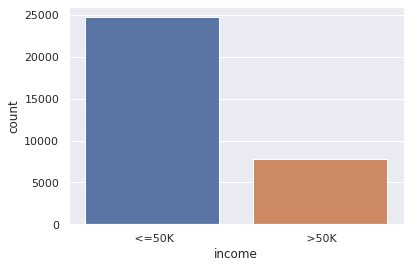

In [31]:
# Visualizing Target Distribution
sns.countplot(data = df , x = 'income');

**Numeric Variable Distributions**

In [32]:
# select only numeric columns
df_num = df.select_dtypes(include=['float64' , 'int64'])
df_num.sample(5)

,age,fnlwght,education-num,capital-gain,capital-loss,hours-per-week
23543,32,199539,10,0,0,40
15117,49,149049,10,14344,0,45
8309,46,148254,9,0,0,60
28942,37,289886,10,0,0,30
16294,34,205256,9,2885,0,80


In [33]:
# numeric summary
df_num.describe()

,age,fnlwght,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


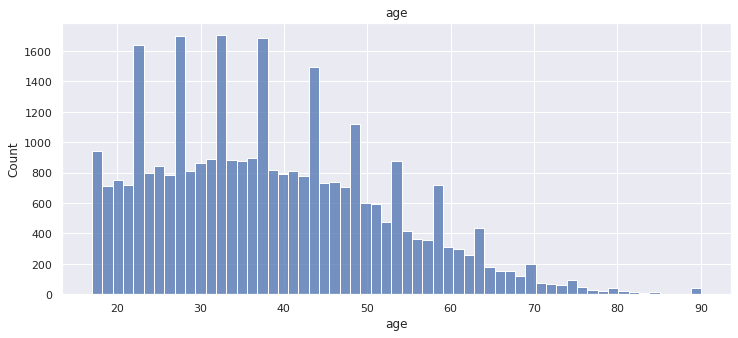

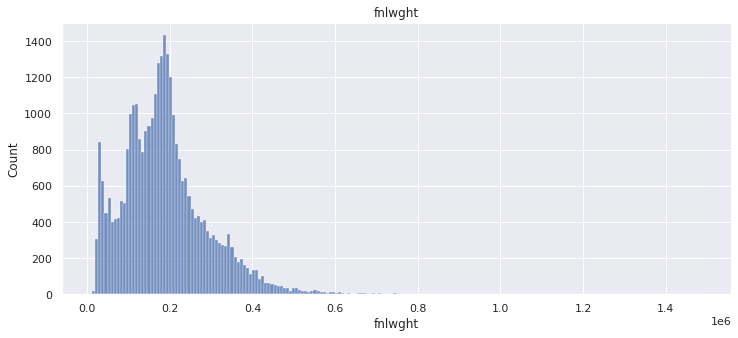

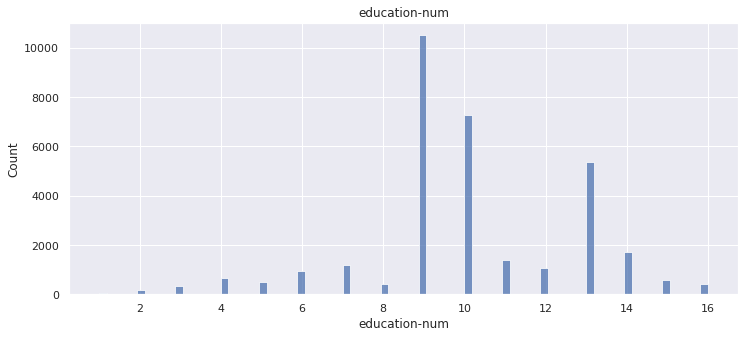

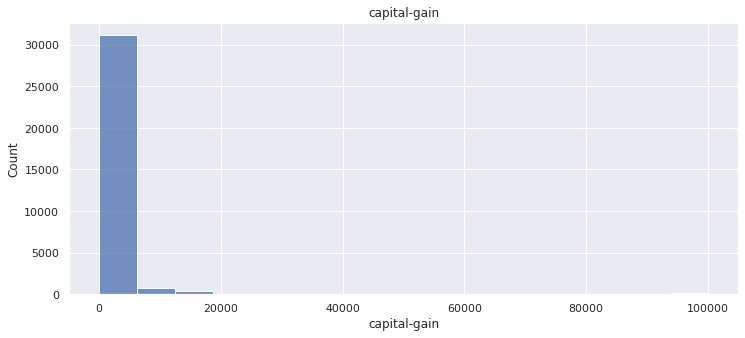

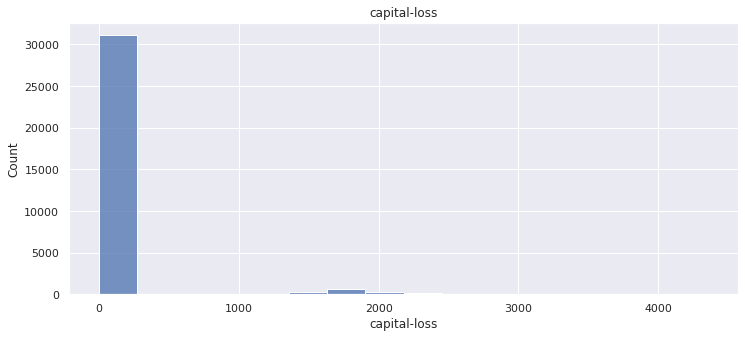

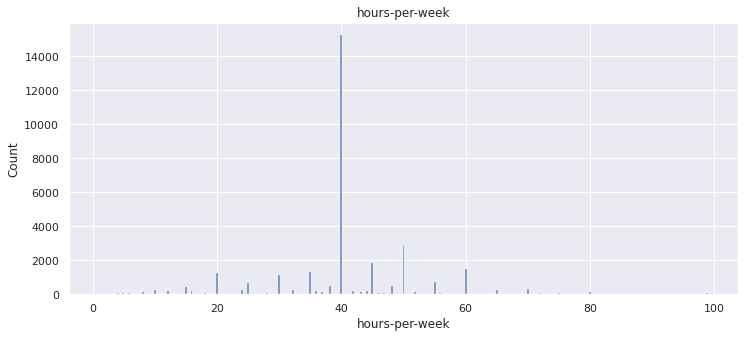

In [34]:
# Histogram of numeric features
for i in df_num.columns:
    plt.figure(figsize=(12,5))
    plt.title(i)
    sns.histplot(df_num[i]);

**Non-Numeric Variable Distribution**

In [35]:
# select non-numeric columns
df_cat = df.select_dtypes(include=['object' ])
df_cat.sample(5)

,workclass,education,marital-status,occupation,relationship,race,sex,native_country,income
14652,Self-emp-not-inc,Bachelors,Married-civ-spouse,Sales,Wife,White,Female,United-States,>50K
22344,State-gov,Some-college,Never-married,Protective-serv,Own-child,White,Male,United-States,<=50K
4611,Private,HS-grad,Married-civ-spouse,Sales,Husband,Amer-Indian-Eskimo,Male,United-States,<=50K
15192,?,Bachelors,Married-civ-spouse,?,Wife,White,Female,United-States,<=50K
10946,Private,Assoc-voc,Never-married,Adm-clerical,Own-child,White,Female,United-States,<=50K


In [36]:
# distribution of categories
for i in df_cat.columns:
    print('----------------------------------')
    print(df_cat[i].value_counts())

----------------------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
----------------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
----------------------------------
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23


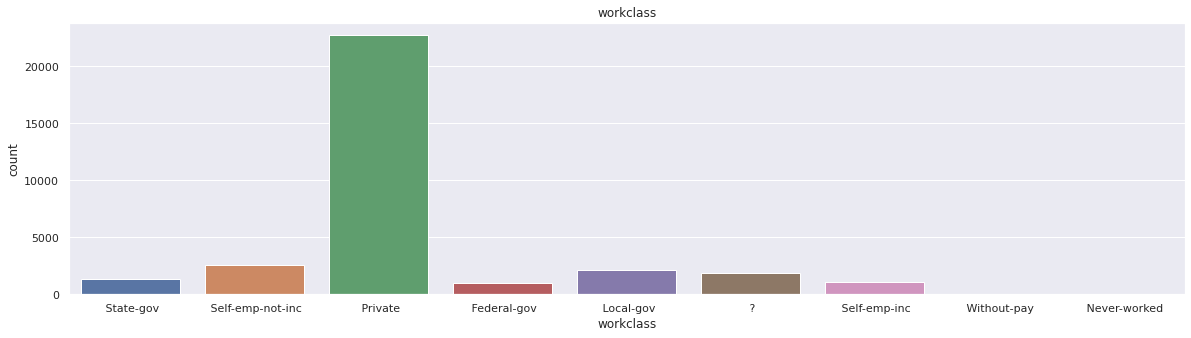

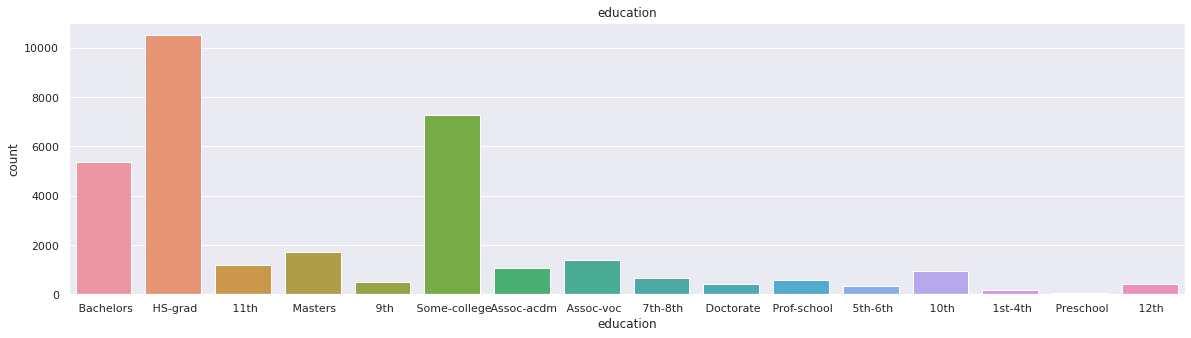

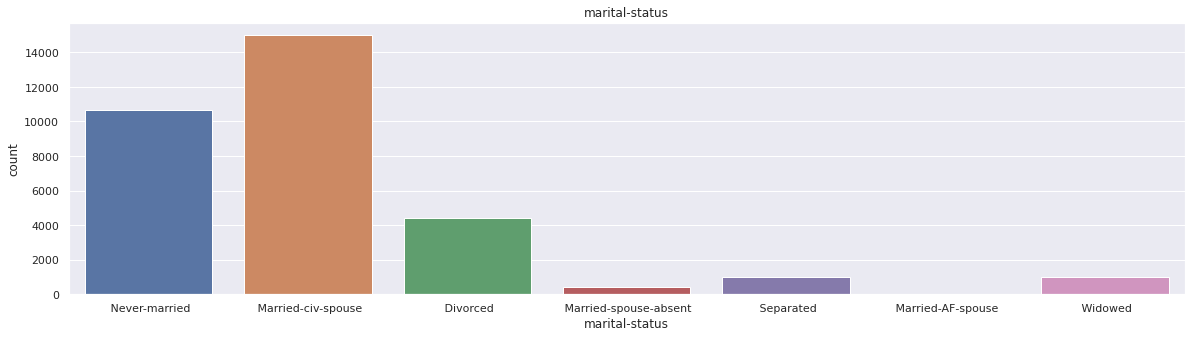

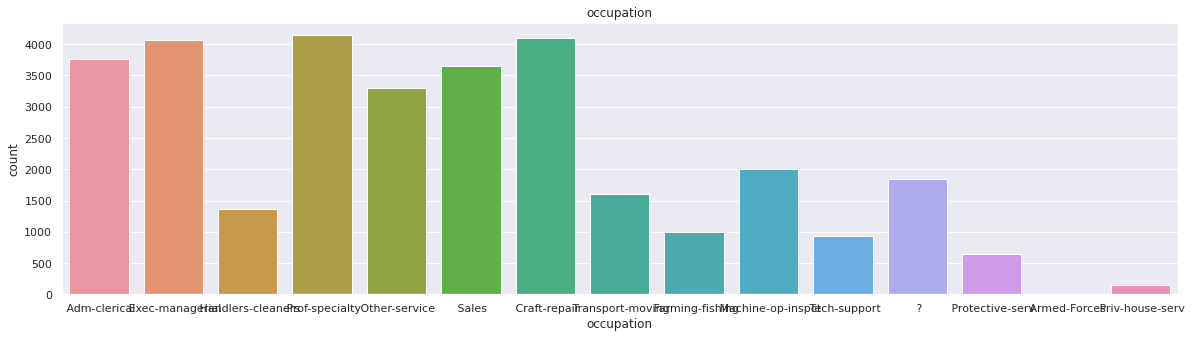

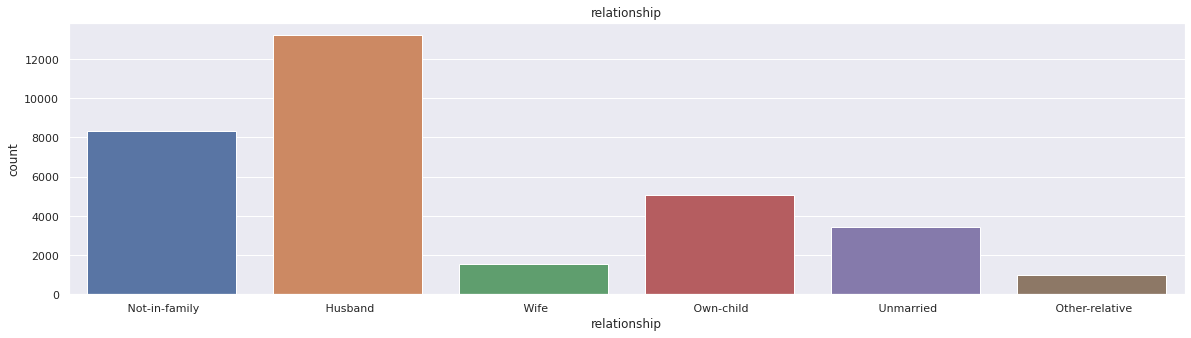

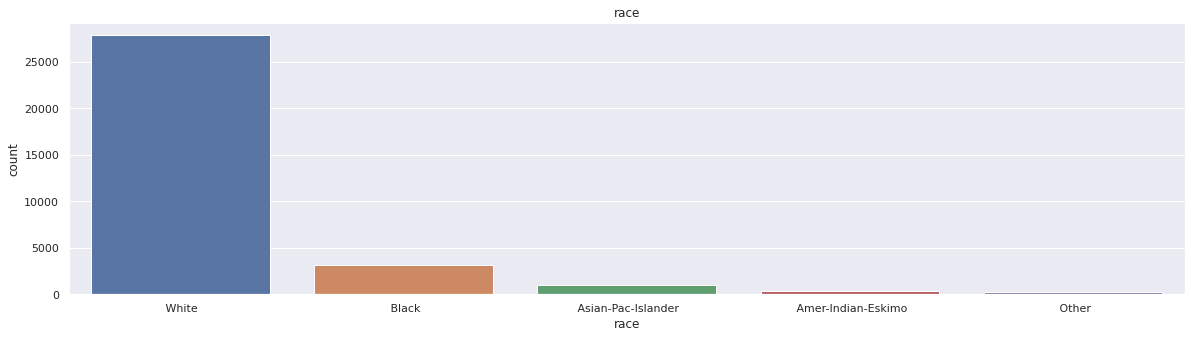

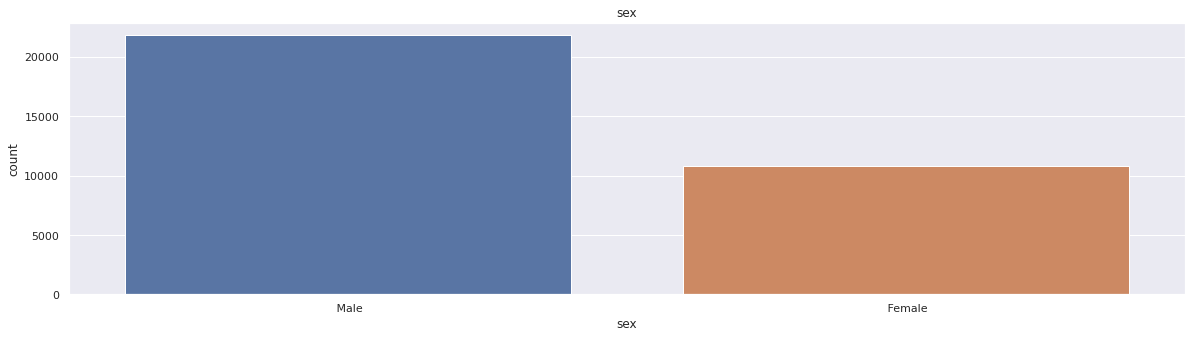

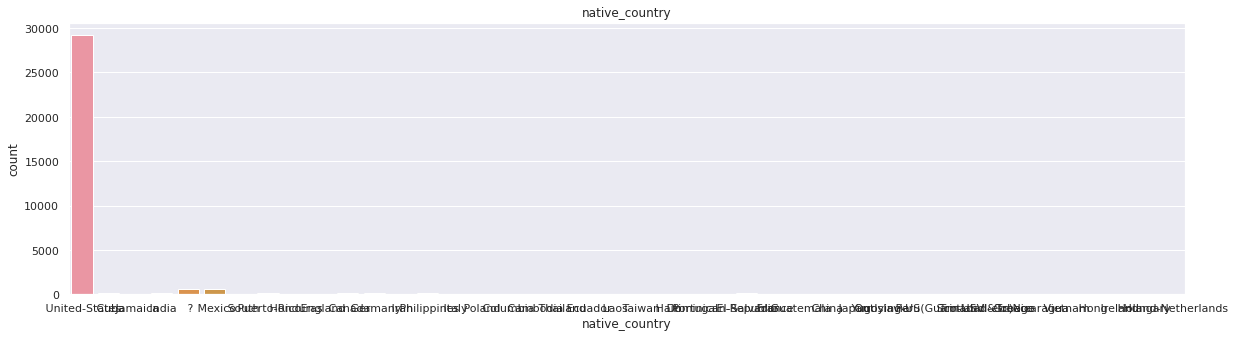

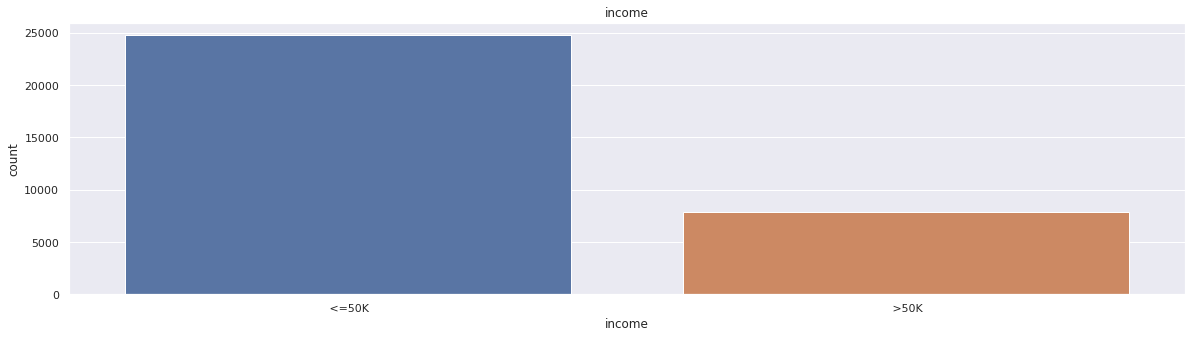

In [37]:
# barplot of categorical variables with diffrent sub-category counts
for i in df_cat.columns:
    plt.figure(figsize=(20,5))
    plt.title(i)
    sns.countplot(df_cat[i]);